# **Input Data**

In [1]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')


from glob import glob
import IPython.display
import PIL.Image

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.metrics import roc_auc_score, confusion_matrix

from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential, model_from_json
from tensorflow.python.keras.utils import np_utils
import cv2

from sklearn import *

#load data

X_train = np.load('/content/drive/My Drive/Input/X_train_array.npy')
X_test = np.load('/content/drive/My Drive/Input/X_test_array.npy')
X_val = np.load('/content/drive/My Drive/Input/X_val_array.npy')

y_train = np.load('/content/drive/My Drive/Input/y_train_array.npy')
y_test = np.load('/content/drive/My Drive/Input/y_test_array.npy')
y_val = np.load('/content/drive/My Drive/Input/y_val_array.npy')

# define an empty sequential structure 

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


In [0]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=2)
 
#input shape must be at least 75x75  
#Load the Inception_V3 model
#inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=2)
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=2)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=2)

In [0]:
from keras.applications import vgg16, resnet50, mobilenet

In [0]:
from keras.layers import Input
from keras.models import Model

#preprocess images for vgg16
prepared_images_train = vgg16.preprocess_input(X_train)
prepared_images_validation = vgg16.preprocess_input(X_val)
prepared_images_test = vgg16.preprocess_input(X_test)

#Load the VGG model
#input_tensor = Input((96, 96, 3))
  
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input((32,32,3)))
#resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3), pooling='max')

my_model = Sequential()

my_model.add(vgg_model)
my_model.add(Flatten())
my_model.add(Dense(256, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(1, activation = "sigmoid"))

#Create your own model 
#my_model = Model(input=input, output=x)

vgg_model.trainable=False

### Compile model
my_model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# print model layers' info
print(my_model.summary())

#fit the model

m = my_model.fit(
    prepared_images,            # features (as dense inputs)
    y_train,            # labels
    epochs=100,        # number of epochs
    batch_size=32,  # define batch size
    verbose=2,              # the most extended verbose
    validation_data=(       
        prepared_images_validation,          # the validation split that we did before
        y_val
    )
  )


In [0]:
features = vgg_model.predict(prepared_images_test)

# **ResNet50 Model**

In [2]:
from keras.applications.resnet50 import ResNet50

dropout_fc = 0.5

conv_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

my_model = Sequential()

my_model.add(conv_base)
my_model.add(Flatten())
my_model.add(Dense(256, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(128, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(64, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(1, activation = "sigmoid"))

W0904 08:39:50.285806 139856162535296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 08:39:50.370163 139856162535296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 08:39:50.400788 139856162535296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4479: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0904 08:39:50.448475 139856162535296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0904 08:39:50.449683

94658560/94653016 [==============================] - 7s 0us/step


W0904 08:40:16.899653 139856162535296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Train the whole model**

In [0]:
my_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524288    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_50 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [0]:
from keras import optimizers
my_model.compile(optimizers.Adam(0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

W0902 11:54:04.085388 140461186254720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0902 11:54:04.098268 140461186254720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
mc = ModelCheckpoint('ResNet_model2_pretrained.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = my_model.fit(X_train,
                                 y_train,    
                                 epochs = 50,
                                 batch_size=32,
                                 validation_data = (
                                     X_val,
                                     y_val
                                 ),
                                 callbacks = [reduce, mc],
                                 verbose = 2)


Train on 178218 samples, validate on 19802 samples
Epoch 1/50
 - 1085s - loss: 0.4551 - acc: 0.7990 - val_loss: 0.4221 - val_acc: 0.8099

Epoch 00001: val_acc improved from -inf to 0.80992, saving model to ResNet_model2_pretrained.h5
Epoch 2/50
 - 1089s - loss: 0.4348 - acc: 0.8092 - val_loss: 0.8949 - val_acc: 0.6536

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_acc did not improve from 0.80992
Epoch 3/50
 - 1083s - loss: 0.3820 - acc: 0.8389 - val_loss: 0.3614 - val_acc: 0.8431

Epoch 00003: val_acc improved from 0.80992 to 0.84310, saving model to ResNet_model2_pretrained.h5
Epoch 4/50
 - 1086s - loss: 0.3661 - acc: 0.8458 - val_loss: 0.3515 - val_acc: 0.8505

Epoch 00004: val_acc improved from 0.84310 to 0.85047, saving model to ResNet_model2_pretrained.h5
Epoch 5/50
 - 1078s - loss: 0.3559 - acc: 0.8509 - val_loss: 0.4145 - val_acc: 0.8158

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 

In [0]:
my_model.save_weights('/content/drive/My Drive/Input_New/model_no_earlystopping_ResNet.h5')

**Train last 7 layers of ResNet**

W0904 08:40:48.145517 139856162535296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 08:40:48.158257 139856162535296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524288    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_50 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

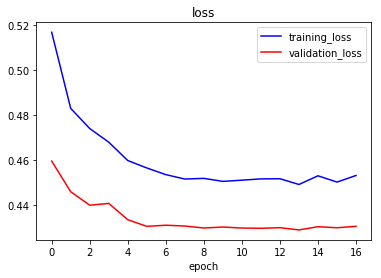

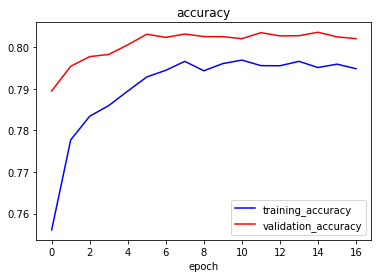

Loss = 0.429901
Accuracy: 0.806507
Precision: 0.789101
Recall: 0.713468
F1 score: 0.749381
Cohens kappa: 0.592455
ROC AUC: 0.791713
Confusion matrix:
[[11366  1699]
 [ 2553  6357]]


In [3]:
#conv_base.Trainable=False

#set_trainable=False
#for layer in conv_base.layers:
#    if layer.name == 'res5a_branch2a':
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False

for layer in conv_base.layers:
  set_trainable = False
  layer.trainable = False
  
#conv_base.layers[-7:]

for layer in conv_base.layers[-7:]:
  set_trainable = True
  layer.trainable = True
  
my_model.summary()

from keras import optimizers
my_model.compile(optimizers.Adam(0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
mc = ModelCheckpoint('ResNet_model_7_pretrained.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = my_model.fit(X_train,
                                 y_train,    
                                 epochs = 20,
                                 batch_size=32,
                                 validation_data = (
                                     X_val,
                                     y_val
                                 ),
                                 callbacks = [reduce, mc, earlystopper],
                                 verbose = 1)

my_model.save_weights('/content/drive/My Drive/Input_New/ResNet_model_7layers.h5')

#show results
plt.plot(my_model.history.history['loss'], color='blue', label="training_loss")
plt.plot(my_model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(my_model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(my_model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = my_model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]

# evaluate model
loss,_ = my_model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

**Train only the output layers**

In [0]:
#conv_base.Trainable=False

#set_trainable=False
#for layer in conv_base.layers:
#    if layer.name == 'res5a_branch2a':
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False

for layer in conv_base.layers:
  set_trainable = False
  layer.trainable = False
  
my_model.summary()    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524288    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_50 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
from keras import optimizers
my_model.compile(optimizers.Adam(0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
mc = ModelCheckpoint('ResNet_model3_pretrained.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = my_model.fit(X_train,
                                 y_train,    
                                 epochs = 20,
                                 batch_size=32,
                                 validation_data = (
                                     X_val,
                                     y_val
                                 ),
                                 callbacks = [reduce, mc, earlystopper],
                                 verbose = 1)


Train on 158220 samples, validate on 39555 samples
Epoch 1/20
158220/158220 [==============================] - 333s 2ms/step - loss: 0.5160 - acc: 0.7566 - val_loss: 0.4578 - val_acc: 0.7915

Epoch 00001: val_acc improved from -inf to 0.79151, saving model to ResNet_model3_pretrained.h5
Epoch 2/20
158220/158220 [==============================] - 324s 2ms/step - loss: 0.4837 - acc: 0.7763 - val_loss: 0.4503 - val_acc: 0.7925

Epoch 00002: val_acc improved from 0.79151 to 0.79254, saving model to ResNet_model3_pretrained.h5
Epoch 3/20
158220/158220 [==============================] - 323s 2ms/step - loss: 0.4732 - acc: 0.7840 - val_loss: 0.4420 - val_acc: 0.7986

Epoch 00003: val_acc improved from 0.79254 to 0.79863, saving model to ResNet_model3_pretrained.h5
Epoch 4/20
158220/158220 [==============================] - 324s 2ms/step - loss: 0.4680 - acc: 0.7847 - val_loss: 0.4396 - val_acc: 0.7989

Epoch 00004: val_acc improved from 0.79863 to 0.79889, saving model to ResNet_model3_pretra

In [0]:
my_model.save_weights('/content/drive/My Drive/Input_New/ResNet_model_256-128-64-1.h5')

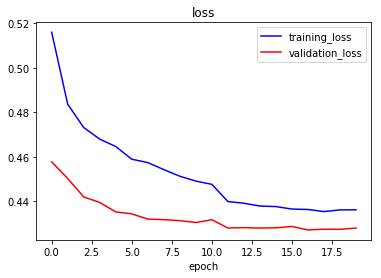

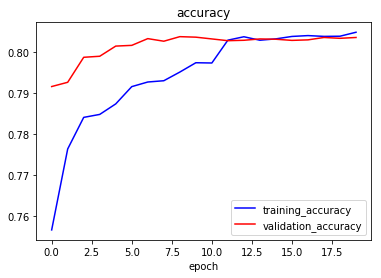

Loss = 0.425670
Accuracy: 0.806689
Precision: 0.791594
Recall: 0.710213
F1 score: 0.748699
Cohens kappa: 0.592381
ROC AUC: 0.791348
Confusion matrix:
[[11399  1666]
 [ 2582  6328]]


In [0]:
#show results
plt.plot(my_model.history.history['loss'], color='blue', label="training_loss")
plt.plot(my_model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(my_model.history.history['acc'], color='blue', label="training_accuracy")
plt.plot(my_model.history.history['val_acc'], color='red', label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = my_model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]

# evaluate model
loss,_ = my_model.evaluate(X_test, y_test, verbose=0)
print('Loss = %.6f' % loss)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)

**Instead of 256-128-64 check the 128-64-32-16 model**

In [0]:
from keras.applications.resnet50 import ResNet50

conv_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

my_model = Sequential()

my_model.add(conv_base)
my_model.add(Flatten())

my_model.add(Dense(256, use_bias=False))
my_model.add(Activation("relu"))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))

my_model.add(Dense(128, use_bias=False))
my_model.add(Activation("relu"))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.4))

my_model.add(Dense(64, use_bias=False))
my_model.add(Activation("relu"))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.3))

my_model.add(Dense(32, use_bias=False))
my_model.add(Activation("relu"))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.2))

my_model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
for layer in conv_base.layers:
  set_trainable = False
  layer.trainable = False
  
my_model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               524288    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_155 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32768     
__________

In [0]:
from keras import optimizers
my_model.compile(optimizers.Adam(0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [0]:
earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
mc = ModelCheckpoint('ResNet_model5_pretrained.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = my_model.fit(X_train,
                                 y_train,    
                                 epochs = 20,
                                 batch_size=32,
                                 validation_data = (
                                     X_val,
                                     y_val
                                 ),
                                 callbacks = [reduce, earlystopper, mc],
                                 verbose = 1)


Train on 178218 samples, validate on 19802 samples
Epoch 1/20
178218/178218 [==============================] - 336s 2ms/step - loss: 0.5140 - acc: 0.7547 - val_loss: 0.4650 - val_acc: 0.7888

Epoch 00001: val_acc improved from -inf to 0.78876, saving model to ResNet_model4_pretrained.h5
Epoch 2/20
178218/178218 [==============================] - 328s 2ms/step - loss: 0.4883 - acc: 0.7719 - val_loss: 0.4576 - val_acc: 0.7908

Epoch 00002: val_acc improved from 0.78876 to 0.79083, saving model to ResNet_model4_pretrained.h5
Epoch 3/20
178218/178218 [==============================] - 324s 2ms/step - loss: 0.4817 - acc: 0.7764 - val_loss: 0.4490 - val_acc: 0.7939

Epoch 00003: val_acc improved from 0.79083 to 0.79386, saving model to ResNet_model4_pretrained.h5
Epoch 4/20
178218/178218 [==============================] - 326s 2ms/step - loss: 0.4789 - acc: 0.7768 - val_loss: 0.4466 - val_acc: 0.7959

Epoch 00004: val_acc improved from 0.79386 to 0.79593, saving model to ResNet_model4_pretra

**Almost Single flatten level - smallest FP**

In [0]:
from keras.applications.resnet50 import ResNet50

conv_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

my_model = Sequential()

my_model.add(conv_base)
my_model.add(Flatten())
my_model.add(Dense(1024, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(0.5))
my_model.add(Dense(512, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(0.4))
my_model.add(Dense(1, activation = "sigmoid"))

for layer in conv_base.layers:
  set_trainable = False
  layer.trainable = False
  
my_model.summary()  

from keras import optimizers
my_model.compile(optimizers.Adam(0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
mc = ModelCheckpoint('ResNet_model5_pretrained.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = my_model.fit(X_train,
                                 y_train,    
                                 epochs = 20,
                                 batch_size=32,
                                 validation_data = (
                                     X_val,
                                     y_val
                                 ),
                                 callbacks = [reduce, mc],
                                 verbose = 1)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2097152   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_298 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524288    
__________

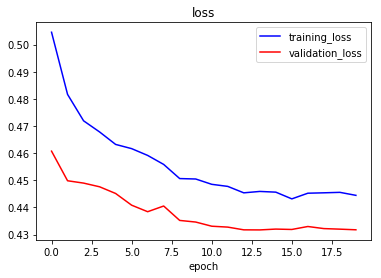

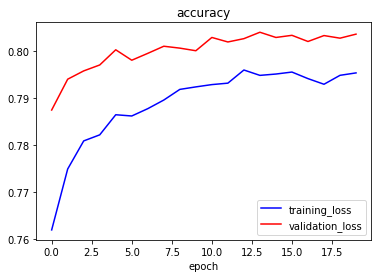

loss = 43.212
accuracy =  80.194
Accuracy: 0.801936
Precision: 0.793579
Recall: 0.690642
F1 score: 0.738541
Cohens kappa: 0.580360
ROC AUC: 0.784172
Confusion matrix:
[[11490  1601]
 [ 2757  6155]]


In [0]:
my_model.save_weights('/content/drive/My Drive/Input_New/ResNet_model_1024_512_1.h5')

plt.plot(my_model.history.history['loss'], color='blue', label="training_loss")
plt.plot(my_model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(my_model.history.history['acc'], color='blue', label="training_loss")
plt.plot(my_model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

# evaluate model
loss,acc = my_model.evaluate(X_test, y_test, verbose=0)
print('loss = %.3f' % (loss * 100.0))
print('accuracy =  %.3f' % (acc * 100.0))

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

###########
# predict crisp classes for test set
yhat_classes = my_model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix:')
print(matrix)



# **VGG16 Model**0

In [0]:
from keras.applications import vgg16

dropout_fc = 0.5 

#Load the VGG model
conv_base = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

my_model = Sequential()

my_model.add(conv_base)
my_model.add(Flatten())
my_model.add(Dense(256, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(128, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(64, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(1, activation = "sigmoid"))

from keras import optimizers
my_model.compile(optimizers.Adam(0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

my_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131072    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32768     
__________

In [0]:
#preprocess images for vgg16
prepared_images_train = vgg16.preprocess_input(X_train)
prepared_images_validation = vgg16.preprocess_input(X_val)
prepared_images_test = vgg16.preprocess_input(X_test)

In [0]:
earlystopper = EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
mc = ModelCheckpoint('VGG16_model1_pretrained.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = my_model.fit(prepared_images_train,
                                 y_train,    
                                 epochs = 20,
                                 batch_size=32,
                                 validation_data = (
                                     prepared_images_validation,
                                     y_val
                                 ),
                                 callbacks = [reduce, earlystopper],
                                 verbose = 1)


Train on 178218 samples, validate on 19802 samples
Epoch 1/20
178218/178218 [==============================] - 501s 3ms/step - loss: 0.5662 - acc: 0.7174 - val_loss: 6.5280 - val_acc: 0.5950
Epoch 2/20
178218/178218 [==============================] - 493s 3ms/step - loss: 0.5563 - acc: 0.7237 - val_loss: 6.5280 - val_acc: 0.5950

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/20
178218/178218 [==============================] - 494s 3ms/step - loss: 0.5362 - acc: 0.7418 - val_loss: 6.5280 - val_acc: 0.5950

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/20
178218/178218 [==============================] - 493s 3ms/step - loss: 0.5301 - acc: 0.7480 - val_loss: 1.5575 - val_acc: 0.5950
Epoch 5/20
 15968/178218 [=>............................] - ETA: 7:19 - loss: 0.5262 - acc: 0.7506

KeyboardInterrupt: ignored

# **NasNet Model**

In [0]:
from keras.applications.nasnet import NASNetMobile
from keras.layers import Input
from keras.models import Model


input_shape = (32, 32, 3)
inputs = Input(input_shape)

nas_net = NASNetMobile(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

my_model = Sequential()

my_model.add(conv_base)
my_model.add(Flatten())
my_model.add(Dense(256, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(128, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(64, use_bias=False))
my_model.add(BatchNormalization())
my_model.add(Activation("relu"))
my_model.add(Dropout(dropout_fc))
my_model.add(Dense(1, activation = "sigmoid"))

model = Model(inputs, outputs)
model.compile(optimizer=Adam(lr=0.0001, decay=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

# **Check Results**

In [0]:
#show results

plt.plot(model.history.history['loss'], color='blue', label="training_loss")
plt.plot(model.history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'], color='blue', label="training_loss")
plt.plot(model.history.history['val_acc'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()


In [0]:
# evaluate model
loss,acc = my_model.evaluate(X_test, y_test, verbose=0)
print('loss = %.3f' % (loss * 100.0))
print('accuracy =  %.3f' % (acc * 100.0))

loss = 33.822
accuracy =  85.943


In [0]:
#predict y_test
y_test_pred = model.predict_classes(X_test)

In [0]:
#confusion matrix
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_pred).ravel()

In [0]:
roc_auc_score(y_test, y_test_pred)

In [0]:
y_test_pred

In [0]:
(tn, fp, fn, tp)